**Titanic is one of the most big disaster in the history in 1912. It sank after hitting the iceberg. 2224 passengers and employees are died.**

In [1008]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [1009]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_PassengerID=test_df['PassengerId']

In [1010]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=>>> There are total 12 columns.

In [1011]:
train_df.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458299999999999,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000000000000,0,0,17463,51.862499999999997,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000000000000,3,1,349909,21.074999999999999,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000000000000,0,2,347742,11.133300000000000,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000000000000,1,0,237736,30.070799999999998,NaN,C


In [1012]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000000000000,0,0,211536,13.000000000000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000000000000,0,0,112053,30.000000000000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.449999999999999,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000000000000,0,0,111369,30.000000000000000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000000000000,0,0,370376,7.750000000000000,NaN,Q


In [1013]:
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,nan,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050000000000001,NaN,S
1305,1306,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,PC 17758,108.900000000000006,C105,C
1306,1307,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,SOTON/O.Q. 3101262,7.250000000000000,NaN,S
1307,1308,nan,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050000000000001,NaN,S


=>>> PAssengerID and Ticket columns can be dropped.

In [1014]:
train_df.drop(labels = ["PassengerId", "Ticket", "Cabin"], axis = 1, inplace = True)

In [1015]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S


In [1016]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000000000000,1309.000000000000000,1046.000000000000000,1309.000000000000000,1309.000000000000000,1308.000000000000000
mean,0.383838383838384,2.294881588999236,29.881137667304014,0.498854087089381,0.385026737967914,33.295479281345600
std,0.486592454264858,0.837836018970132,14.413493211271334,1.041658390596098,0.865560275349513,51.758668239174142
min,0.000000000000000,1.000000000000000,0.170000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,2.000000000000000,21.000000000000000,0.000000000000000,0.000000000000000,7.895800000000000
50%,0.000000000000000,3.000000000000000,28.000000000000000,0.000000000000000,0.000000000000000,14.454200000000000
75%,1.000000000000000,3.000000000000000,39.000000000000000,1.000000000000000,0.000000000000000,31.274999999999999
max,1.000000000000000,3.000000000000000,80.000000000000000,8.000000000000000,9.000000000000000,512.329200000000014


=>>> mean and %50 value of Age are so similar. There is no skewed distribution.

=>>> mean and %50 value of Pclass are a little similar.

=>>> mean and %50 value of Fare are not so similar. There is a skewed distribution.

In [1017]:
# show the overall survival rate, as the standard when choosing the fts
print('Overall Survival Ratio: %{}'.format(train_df['Survived'].mean()*100))

Overall Survival Ratio: %38.38383838383838


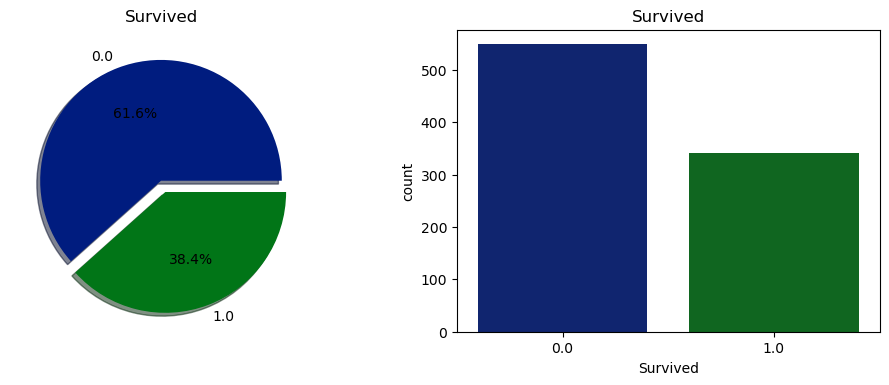

In [1018]:
f,ax=plt.subplots(1,2,figsize=(12,4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [1019]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


=>>> Dataset has 3 float64, 3 int64, 3 object column dtype.

float64 : Fare and Age

int64: Pclass,SibSp, Parch, PassengerID, and Survived

object : Name, Sex, Ticket, Cabin, and Embarked

In [1020]:
train_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [1021]:
train_df.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Fare         281
Embarked       3
dtype: int64

**Categorical Variable Analysis** : Survived, Pclass, Sex, SibsSp, Parch, Embarked, Name

**Numerical Variable Analysis** : Age, Fare

**Categorical Variable Analysis**

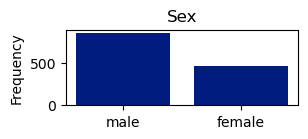

Sex: 
 male      843
female    466
Name: Sex, dtype: int64


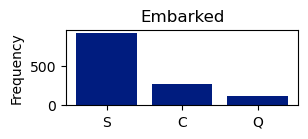

Embarked: 
 S    914
C    270
Q    123
Name: Embarked, dtype: int64


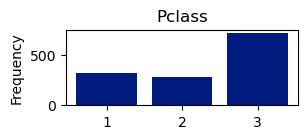

Pclass: 
 3    709
1    323
2    277
Name: Pclass, dtype: int64


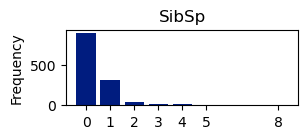

SibSp: 
 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


In [1022]:
def bar_plot(i):
    var= train_df[i]
    varValue=var.value_counts()
    plt.figure(figsize=(3,1))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()
    print('{}: \n {}'.format(i,varValue))
Firstcategory=[ 'Sex', 'Embarked', 'Pclass', 'SibSp']
for c in Firstcategory:
    bar_plot(c)

In [1023]:
Secondcategory=[ 'Name']
for c in Secondcategory:
    print('{} \n'.format(train_df[c].value_counts()))

Kelly, Mr. James                                 2
Connolly, Miss. Kate                             2
Howard, Mrs. Benjamin (Ellen Truelove Arman)     1
Appleton, Mrs. Edward Dale (Charlotte Lamson)    1
Hakkarainen, Mr. Pekka Pietari                   1
                                                ..
Kennedy, Mr. John                                1
Carver, Mr. Alfred John                          1
Douglas, Mrs. Walter Donald (Mahala Dutton)      1
Stranden, Mr. Juho                               1
Chibnall, Mrs. (Edith Martha Bowerman)           1
Name: Name, Length: 1307, dtype: int64 



**Numerical Variable Analysis**

Text(0.5, 1.0, 'Age')

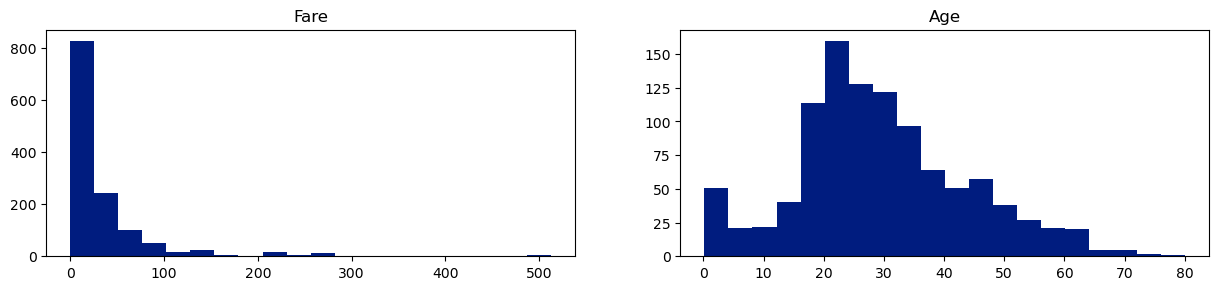

In [1024]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
plt.hist(train_df['Fare'], bins=20)
plt.title("Fare")
plt.subplot(1,2,2)
plt.hist(train_df['Age'], bins=20)
plt.title("Age")

=>>> Age likes positively skewed

In [1025]:
#Pclass vs Survived
train_df[['Pclass', 'Survived']].head(10)

,Pclass,Survived
0,3,0.000000000000000
1,1,1.000000000000000
2,3,1.000000000000000
3,1,1.000000000000000
4,3,0.000000000000000
5,3,0.000000000000000
6,1,0.000000000000000
7,3,0.000000000000000
8,3,1.000000000000000
9,2,1.000000000000000


In [1026]:
#Survived people ratio groupby Pclass:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629629629629630
1,2,0.472826086956522
2,3,0.242362525458248


=>>> Ratio of survived passenger is the most value in 1.pclass.

In [1027]:
#Survived people ratio groupby Sex:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038216560510
1,male,0.188908145580589


=>>> Number of survived female passengers are more than survived male passenger.

In [1028]:
#Survived people ratio groupby Siblings/Spouse :
sursibsp=train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sursibsp

,SibSp,Survived
1,1,0.535885167464115
2,2,0.464285714285714
0,0,0.345394736842105
3,3,0.250000000000000
4,4,0.166666666666667
5,5,0.000000000000000
6,8,0.000000000000000


=>>> Passengers who have 1 sibling/suppose have the most value of survived rate. Passengers that have 5 or 8 sibsp are not survived or there is no possibility of having sibsp.

In [1029]:
#Survived people ratio groupby Parch ( Parent or children) : 
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000000000000
1,1,0.550847457627119
2,2,0.500000000000000
0,0,0.343657817109145
5,5,0.200000000000000
4,4,0.000000000000000
6,6,0.000000000000000
7,9,nan


=>>> If a passenger has 3 children or parents, the survived rate is highest.

In [1030]:
#title_df = train_df.copy()
#title_df["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

#**Outlier Detection**

**Missing Value**

Find and fill the missing value:

In [1031]:
#Finding missing values:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Embarked'], dtype='object')

In [1032]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000000000000,-0.338481035961016,-0.077221094572177,-0.035322498885736,0.081629407083482,0.257306522384962
Pclass,-0.338481035961016,1.000000000000000,-0.408106234236445,0.060832007574908,0.018322202009787,-0.558628732327172
Age,-0.077221094572177,-0.408106234236445,1.000000000000000,-0.243698997664770,-0.150917090363543,0.178739855999641
SibSp,-0.035322498885736,0.060832007574908,-0.243698997664770,1.000000000000000,0.373587190626489,0.160238255914952
Parch,0.081629407083482,0.018322202009787,-0.150917090363543,0.373587190626489,1.000000000000000,0.221538658548192
Fare,0.257306522384962,-0.558628732327172,0.178739855999641,0.160238255914952,0.221538658548192,1.000000000000000


In [1033]:
#Embarked missing
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1.000000000000000,1,"Icard, Miss. Amelie",female,38.000000000000000,0,0,80.000000000000000,NaN
829,1.000000000000000,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000000000000,0,0,80.000000000000000,NaN


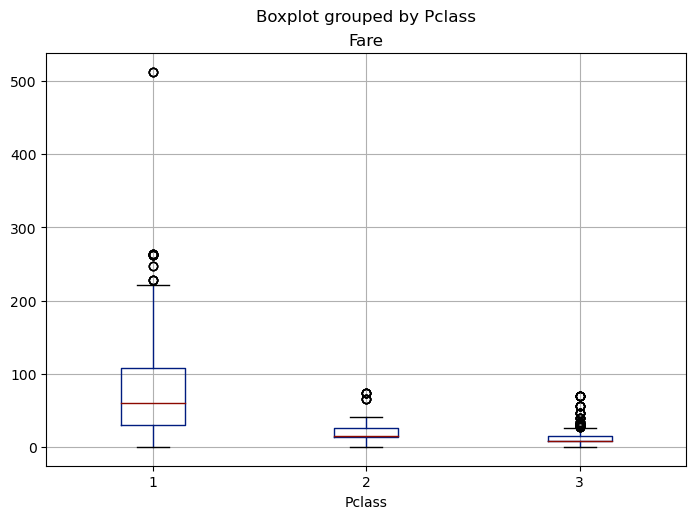

In [1034]:
train_df.boxplot(column='Fare', by='Pclass')
plt.show()

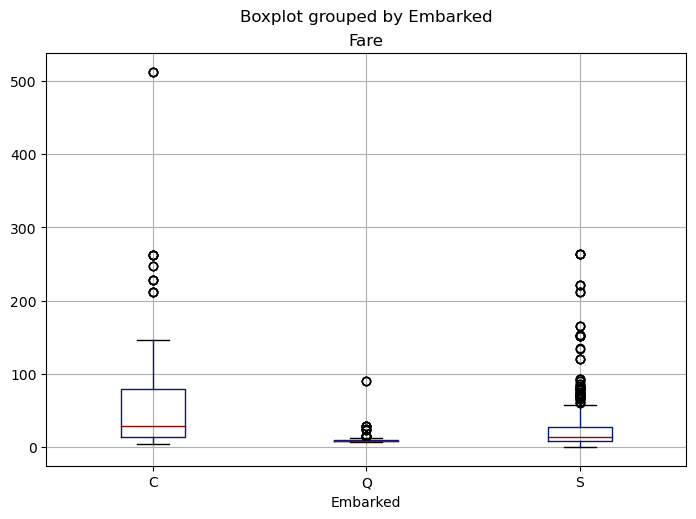

In [1035]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

=>>> C embarked has highest fare and so 1 pclass. So, null is filled by "C".

In [1036]:
train_df['Embarked']= train_df['Embarked'].fillna('C')
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [1037]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Embarked"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S,0,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C,1,0,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S,0,0,1
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S,0,0,1
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S,0,0,1


In [1038]:
train_df.drop(labels=["Q", "Embarked"], axis=1, inplace=True)

In [1039]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,S
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,1,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,0,1
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,0,1
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,nan,3,"Spector, Mr. Woolf",male,nan,0,0,8.050000000000001,0,1
1305,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,108.900000000000006,1,0
1306,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,7.250000000000000,0,1
1307,nan,3,"Ware, Mr. Frederick",male,nan,0,0,8.050000000000001,0,1


In [1040]:
#Fare missing
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,S
1043,nan,3,"Storey, Mr. Thomas",male,60.500000000000000,0,0,nan,0,1


=>>> Only one null value of Fare have 3.Pclass. So it is filled mean of Fare of 3.Pclass.

In [1041]:
train_df['Fare']= train_df['Fare'].fillna(np.mean(train_df[train_df['Pclass']==3]['Fare']))
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,S


In [1042]:
#Age missing
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,S
5,0.000000000000000,3,"Moran, Mr. James",male,nan,0,0,8.458299999999999,0,0
17,1.000000000000000,2,"Williams, Mr. Charles Eugene",male,nan,0,0,13.000000000000000,0,1
19,1.000000000000000,3,"Masselmani, Mrs. Fatima",female,nan,0,0,7.225000000000000,1,0
26,0.000000000000000,3,"Emir, Mr. Farred Chehab",male,nan,0,0,7.225000000000000,1,0
28,1.000000000000000,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,nan,0,0,7.879200000000000,0,0
...,...,...,...,...,...,...,...,...,...,...
1299,nan,3,"Riordan, Miss. Johanna Hannah""""",female,nan,0,0,7.720800000000000,0,0
1301,nan,3,"Naughton, Miss. Hannah",female,nan,0,0,7.750000000000000,0,0
1304,nan,3,"Spector, Mr. Woolf",male,nan,0,0,8.050000000000001,0,1
1307,nan,3,"Ware, Mr. Frederick",male,nan,0,0,8.050000000000001,0,1


In [1043]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Sex"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,S,female,male
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,0,1,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,1,0,1,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,0,1,1,0
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,0,1,1,0
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,0,1,0,1


In [1044]:
train_df.drop(labels = ["Sex"], axis = 1, inplace = True)

In [1045]:
train_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,C,S,female,male
0,0.000000000000000,3,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,0,1,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,1,0,1,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,0,1,1,0
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,0,1,1,0
4,0.000000000000000,3,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,0,1,0,1


In [1046]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Pclass"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,C,S,female,male,1,2,3
0,0.000000000000000,3,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,0,1,0,1,0,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,1,0,1,0,1,0,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,0,1,1,0,0,0,1
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,0,1,1,0,1,0,0
4,0.000000000000000,3,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,0,1,0,1,0,0,1


In [1047]:
train_df.drop(labels = ["Pclass"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,SibSp,Parch,Fare,C,S,female,male,1,2,3
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,0,1,0,1,0,0,1
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,1,0,1,0,1,0,0
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,0,1,1,0,0,0,1
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,0,1,1,0,1,0,0
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,0,1,0,1,0,0,1


In [1048]:
def make_discrete(SibSp):
    if SibSp <= 1:
        return 1
    else:
        return 0
train_df['alone'] = train_df['SibSp'].apply(make_discrete)
display(train_df.head())
train_df.groupby("alone")["SibSp"].count()

,Survived,Name,Age,SibSp,Parch,Fare,C,S,female,male,1,2,3,alone
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,0,1,0,1,0,0,1,1
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,1,0,1,0,1,0,0,1
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,0,1,1,0,0,0,1,1
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,0,1,1,0,1,0,0,1
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,0,1,0,1,0,0,1,1


alone
0      99
1    1210
Name: SibSp, dtype: int64

=>>> 1210 people are only or have 1 sibsp. They must be engaged. So their age filled as 25.

=>>> 99 people have more than 1 sipsp. They must be older.

In [1049]:
train_df.drop(labels = ["SibSp"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,Parch,Fare,C,S,female,male,1,2,3,alone
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,0,7.250000000000000,0,1,0,1,0,0,1,1
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,0,71.283299999999997,1,0,1,0,1,0,0,1
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,7.925000000000000,0,1,1,0,0,0,1,1
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,0,53.100000000000001,0,1,1,0,1,0,0,1
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,8.050000000000001,0,1,0,1,0,0,1,1


In [1050]:
#train_df['Age']= train_df['Age'].fillna(np.median(train_df["Age"]))

In [1051]:
train_df[train_df["Age"].isnull()]

,Survived,Name,Age,Parch,Fare,C,S,female,male,1,2,3,alone
5,0.000000000000000,"Moran, Mr. James",nan,0,8.458299999999999,0,0,0,1,0,0,1,1
17,1.000000000000000,"Williams, Mr. Charles Eugene",nan,0,13.000000000000000,0,1,0,1,0,1,0,1
19,1.000000000000000,"Masselmani, Mrs. Fatima",nan,0,7.225000000000000,1,0,1,0,0,0,1,1
26,0.000000000000000,"Emir, Mr. Farred Chehab",nan,0,7.225000000000000,1,0,0,1,0,0,1,1
28,1.000000000000000,"O'Dwyer, Miss. Ellen ""Nellie""",nan,0,7.879200000000000,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,nan,"Riordan, Miss. Johanna Hannah""""",nan,0,7.720800000000000,0,0,1,0,0,0,1,1
1301,nan,"Naughton, Miss. Hannah",nan,0,7.750000000000000,0,0,1,0,0,0,1,1
1304,nan,"Spector, Mr. Woolf",nan,0,8.050000000000001,0,1,0,1,0,0,1,1
1307,nan,"Ware, Mr. Frederick",nan,0,8.050000000000001,0,1,0,1,0,0,1,1


In [1052]:
train_df.Age.unique

<bound method Series.unique of 0      22.000000000000000
1      38.000000000000000
2      26.000000000000000
3      35.000000000000000
4      35.000000000000000
              ...        
1304                  nan
1305   39.000000000000000
1306   38.500000000000000
1307                  nan
1308                  nan
Name: Age, Length: 1309, dtype: float64>

In [1053]:
if str(train_df["Age"])=='nan':
    train_df['Age']= train_df['Age'].replace(np.median(train_df["Age"]))

In [1054]:
train_df.tail()

,Survived,Name,Age,Parch,Fare,C,S,female,male,1,2,3,alone
1304,nan,"Spector, Mr. Woolf",nan,0,8.050000000000001,0,1,0,1,0,0,1,1
1305,nan,"Oliva y Ocana, Dona. Fermina",39.000000000000000,0,108.900000000000006,1,0,1,0,1,0,0,1
1306,nan,"Saether, Mr. Simon Sivertsen",38.500000000000000,0,7.250000000000000,0,1,0,1,0,0,1,1
1307,nan,"Ware, Mr. Frederick",nan,0,8.050000000000001,0,1,0,1,0,0,1,1
1308,nan,"Peter, Master. Michael J",nan,1,22.358300000000000,1,0,0,1,0,0,1,1


In [1055]:
median_age = int(train_df['Age'].median())
train_df['Age'] = np.where(train_df['Age'].isna() == True, median_age, train_df['Age'])

In [1056]:
train_df.Age.isnull().sum()

0

In [1057]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Name      1309 non-null   object 
 2   Age       1309 non-null   float64
 3   Parch     1309 non-null   int64  
 4   Fare      1309 non-null   float64
 5   C         1309 non-null   uint8  
 6   S         1309 non-null   uint8  
 7   female    1309 non-null   uint8  
 8   male      1309 non-null   uint8  
 9   1         1309 non-null   uint8  
 10  2         1309 non-null   uint8  
 11  3         1309 non-null   uint8  
 12  alone     1309 non-null   int64  
dtypes: float64(3), int64(2), object(1), uint8(7)
memory usage: 70.4+ KB


In [1058]:
train_df[1][1]

1

In [1060]:
for i in range(len(train_df.index)):
    if train_df[1][i]==1:
        train_df['Survived'] = np.where(train_df['Survived'].isna() == True,train_df['Survived'],1)

In [1061]:
train_df.tail(10)

,Survived,Name,Age,Parch,Fare,C,S,female,male,1,2,3,alone
1299,nan,"Riordan, Miss. Johanna Hannah""""",28.000000000000000,0,7.720800000000000,0,0,1,0,0,0,1,1
1300,nan,"Peacock, Miss. Treasteall",3.000000000000000,1,13.775000000000000,0,1,1,0,0,0,1,1
1301,nan,"Naughton, Miss. Hannah",28.000000000000000,0,7.750000000000000,0,0,1,0,0,0,1,1
1302,nan,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37.000000000000000,0,90.000000000000000,0,0,1,0,1,0,0,1
1303,nan,"Henriksson, Miss. Jenny Lovisa",28.000000000000000,0,7.775000000000000,0,1,1,0,0,0,1,1
1304,nan,"Spector, Mr. Woolf",28.000000000000000,0,8.050000000000001,0,1,0,1,0,0,1,1
1305,nan,"Oliva y Ocana, Dona. Fermina",39.000000000000000,0,108.900000000000006,1,0,1,0,1,0,0,1
1306,nan,"Saether, Mr. Simon Sivertsen",38.500000000000000,0,7.250000000000000,0,1,0,1,0,0,1,1
1307,nan,"Ware, Mr. Frederick",28.000000000000000,0,8.050000000000001,0,1,0,1,0,0,1,1
1308,nan,"Peter, Master. Michael J",28.000000000000000,1,22.358300000000000,1,0,0,1,0,0,1,1


In [ ]:
train_df.head()

In [805]:
#Survived missing corralated highly with Pclass
train_df[train_df['Survived'].isnull()]

,Survived,Name,Age,Parch,Fare,C,S,female,male,1,2,3,alone
891,nan,"Kelly, Mr. James",34.500000000000000,0,7.829200000000000,0,0,0,1,0,0,1,1
892,nan,"Wilkes, Mrs. James (Ellen Needs)",47.000000000000000,0,7.000000000000000,0,1,1,0,0,0,1,1
893,nan,"Myles, Mr. Thomas Francis",62.000000000000000,0,9.687500000000000,0,0,0,1,0,1,0,1
894,nan,"Wirz, Mr. Albert",27.000000000000000,0,8.662500000000000,0,1,0,1,0,0,1,1
895,nan,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000000000000,1,12.287500000000000,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,"Spector, Mr. Woolf",28.000000000000000,0,8.050000000000001,0,1,0,1,0,0,1,1
1305,nan,"Oliva y Ocana, Dona. Fermina",39.000000000000000,0,108.900000000000006,1,0,1,0,1,0,0,1
1306,nan,"Saether, Mr. Simon Sivertsen",38.500000000000000,0,7.250000000000000,0,1,0,1,0,0,1,1
1307,nan,"Ware, Mr. Frederick",28.000000000000000,0,8.050000000000001,0,1,0,1,0,0,1,1


In [631]:
train_df.columns

Index(['Survived',     'Name',      'Age',    'Parch',     'Fare',        'C',
              'S',   'female',     'male',          1,          2,          3,
          'alone'],
      dtype='object')

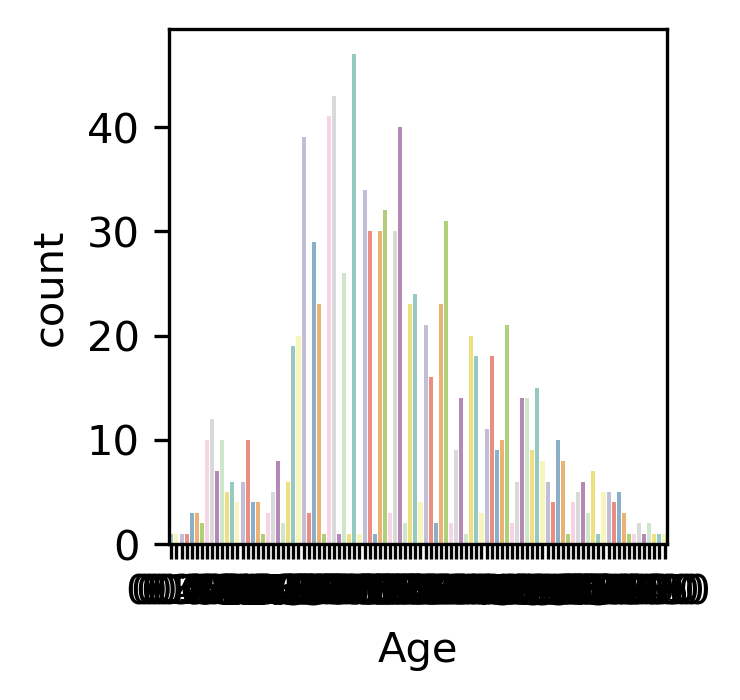

In [632]:
import seaborn as sns
plt.figure(figsize=(15,5), dpi = 300)
plt.subplot(2,6,1)
sns.countplot(x = 'Age', data = train_df, palette="Set3")


plt.show()

In [633]:
train_df.head()

,Survived,Name,Age,Parch,Fare,C,S,female,male,1,2,3,alone
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,0,7.250000000000000,0,1,0,1,0,0,1,1
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,0,71.283299999999997,1,0,1,0,1,0,0,1
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,7.925000000000000,0,1,1,0,0,0,1,1
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,0,53.100000000000001,0,1,1,0,1,0,0,1
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,8.050000000000001,0,1,0,1,0,0,1,1


In [634]:
train_df.isnull().sum()

Survived    418
Name          0
Age         263
Parch         0
Fare          0
C             0
S             0
female        0
male          0
1             0
2             0
3             0
alone         0
dtype: int64

In [570]:
#sns.barplot(x="Age", y="Fare", data=train_df, hue = 'female')
#plt.show()

In [571]:
#plt.figure(figsize=(5,3), dpi = 300)
#sns.scatterplot(x="Age", y="Fare", data=train_df, hue = 'Sex')

In [572]:
#plt.figure(figsize=(5,3), dpi = 200)
#a = sns.scatterplot(x="Fare", y="Embarked", data=train_df)
#plt.show()

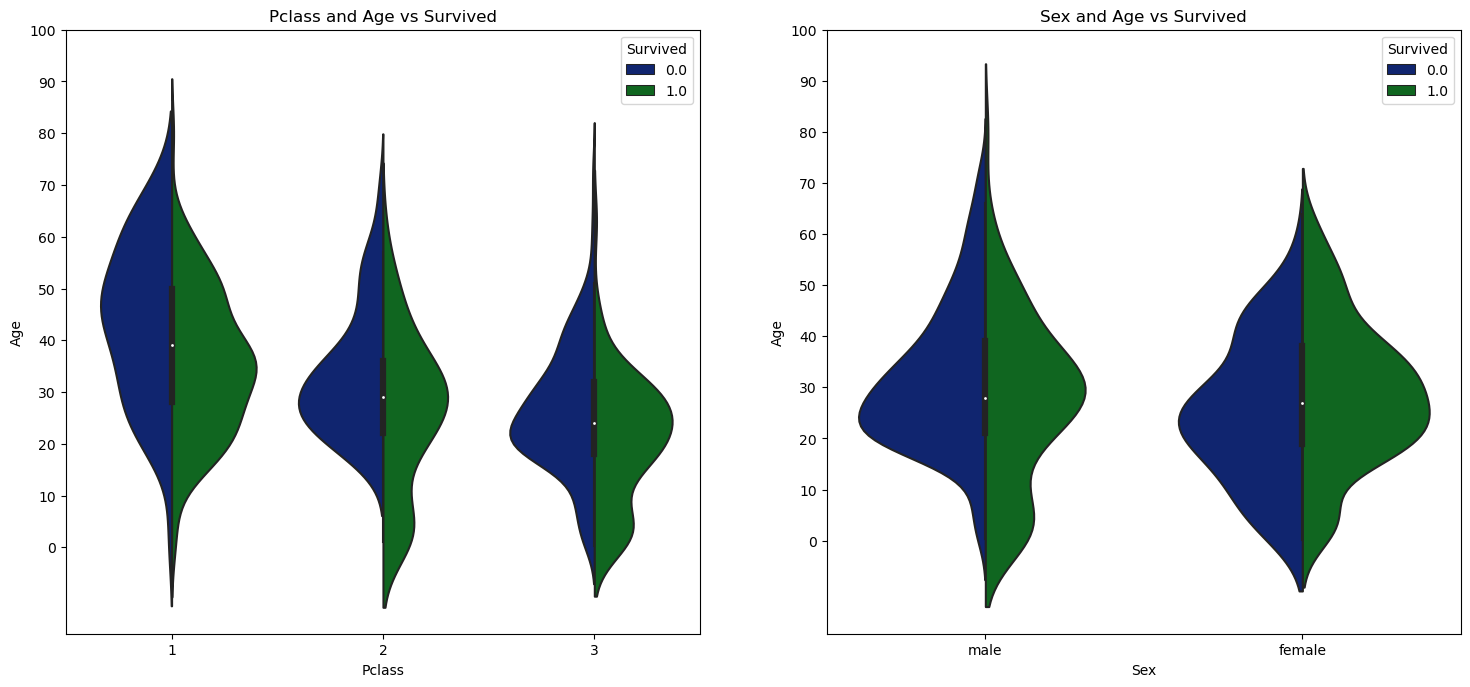

In [110]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**UNIVARIATE ANALYSIS**

**Visualization with Univariate Data**\
Visualization of the Numerical Variables

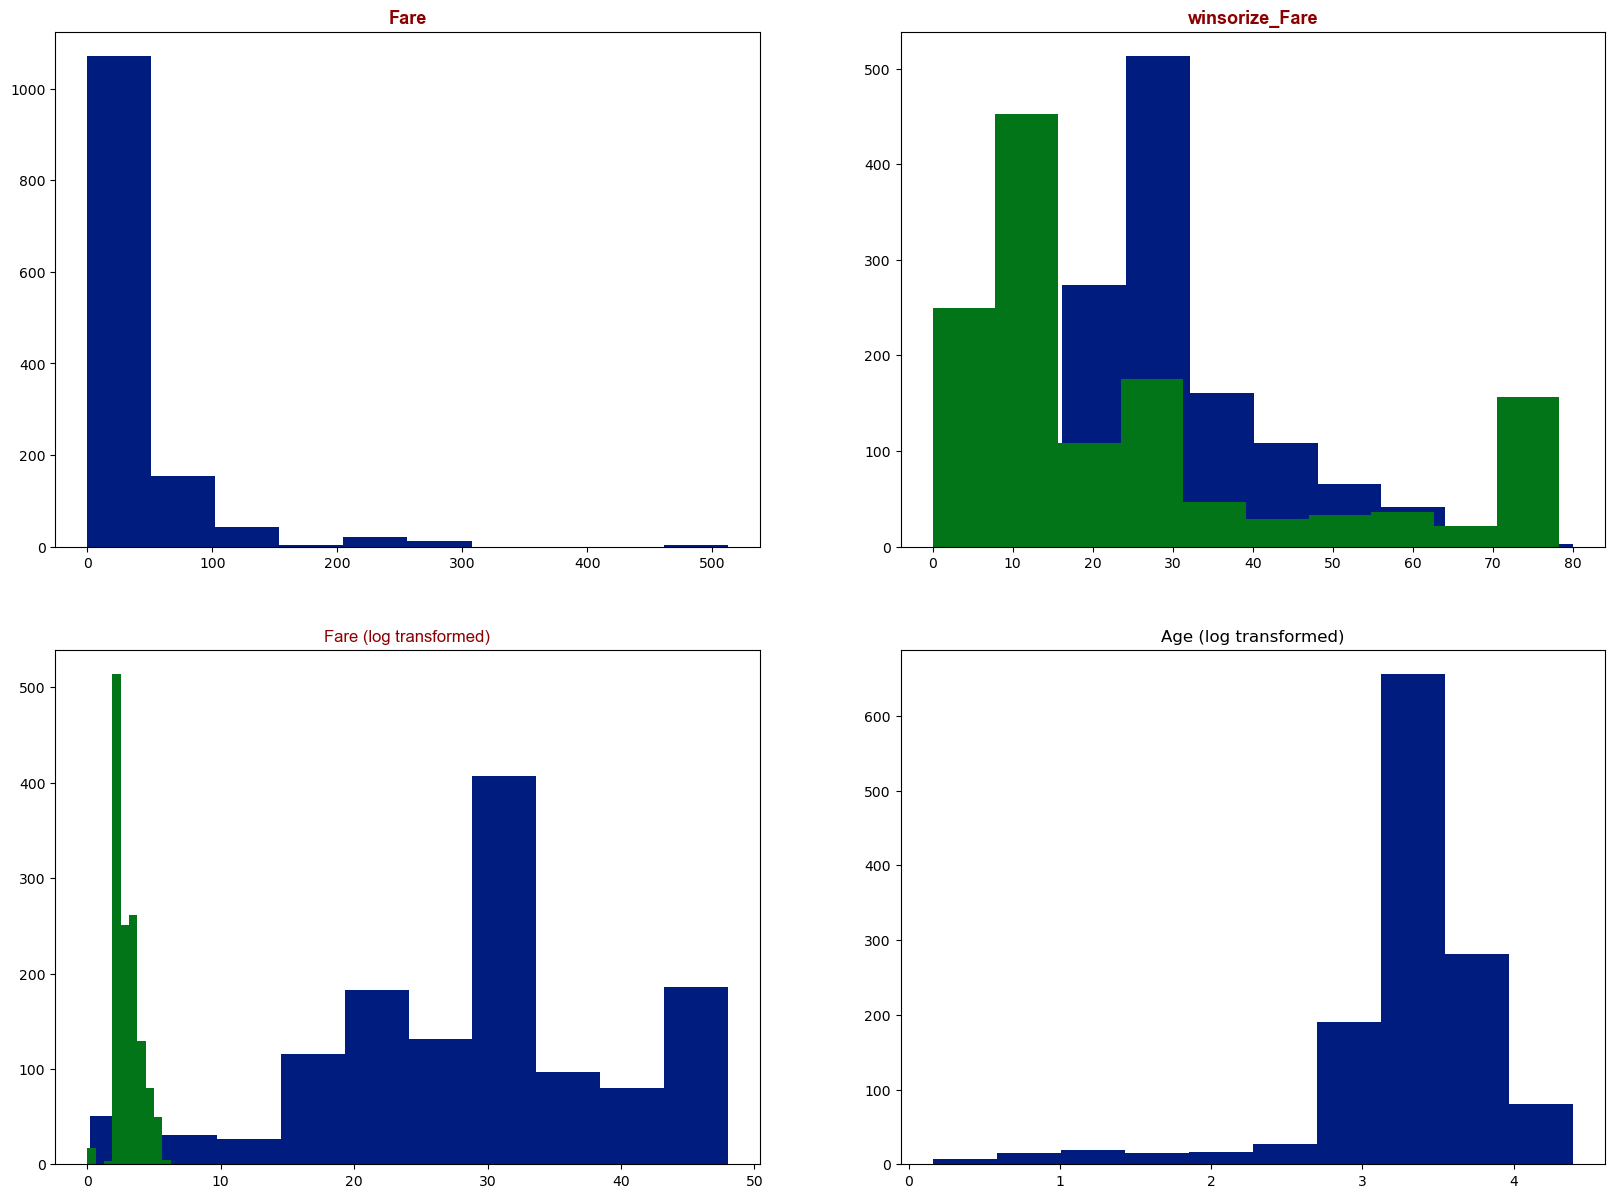

In [584]:
train_df["winsorize_Fare"] = winsorize(train_df["Fare"], (0, 0.10))
train_df["winsorize_Age"] = winsorize(train_df["Age"], (0, 0.10))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['Fare', 'Age']
winsorize_variables= ['winsorize_Fare', 'winsorize_Age']
plt.figure(figsize=(20,15))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.hist(train_df[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(2):
    plt.subplot(2, 2, i+2)
    plt.hist(train_df[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(2):
    plt.subplot(2, 2, i+3)
    plt.hist(np.log(train_df[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)')

Visualization of the Categorical Variables

In [41]:
#!pip install wordcloud

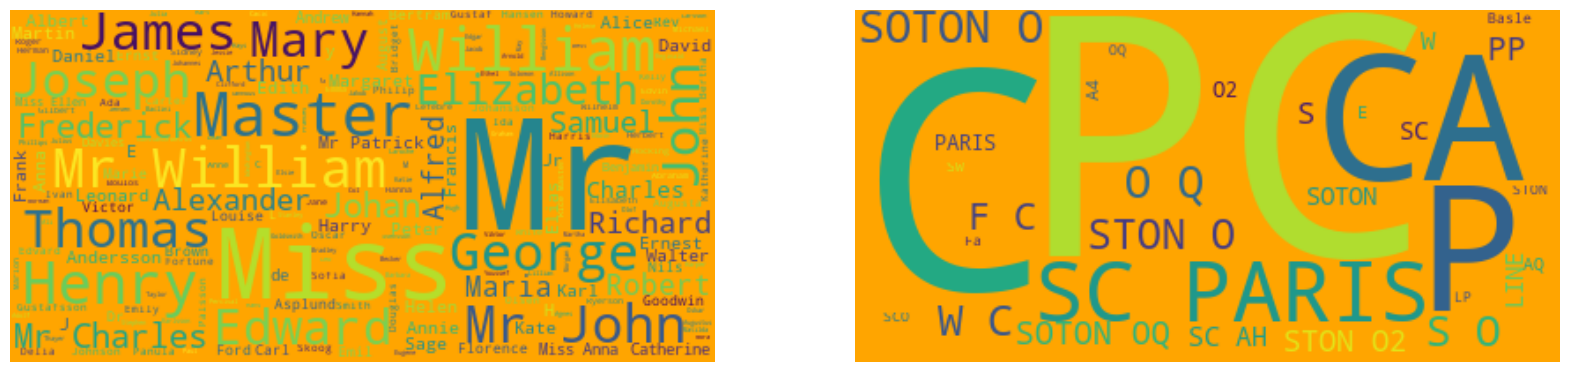

In [42]:
from wordcloud import WordCloud
categories=['Name','Ticket']
plt.figure(figsize=(20,10))
for i, category in enumerate(categories):
    plt.subplot(1,2,i+1)
    wordcloud = WordCloud(background_color="orange").generate(" ".join(train_df[category].dropna()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()

**Bivariate Analysis of Two Continuous Variables**

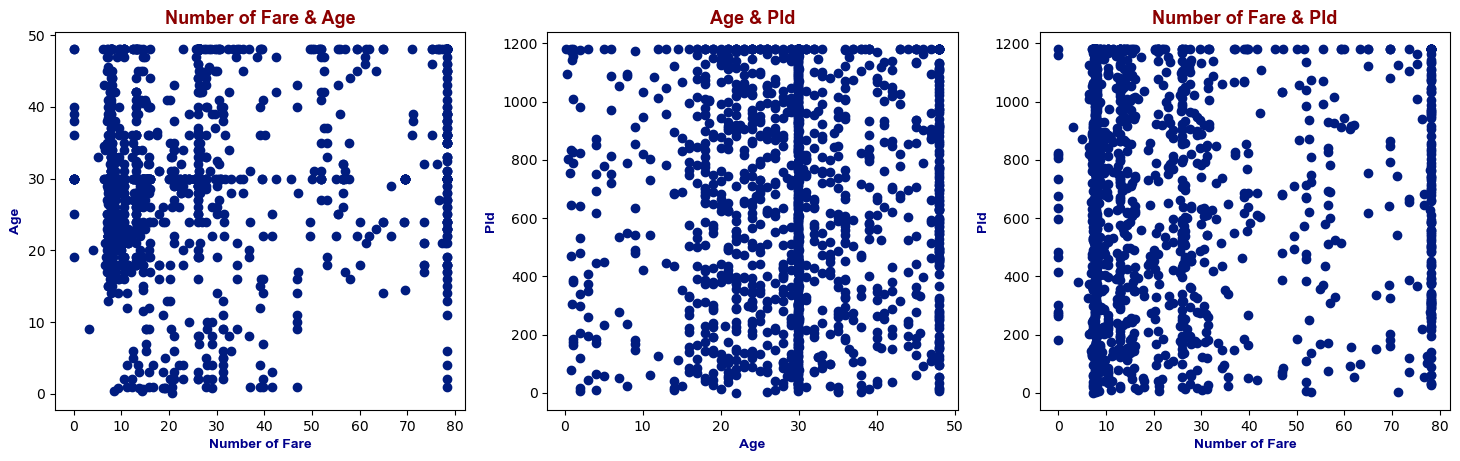

In [43]:
plt.figure(figsize=(18,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(train_df["winsorize_Fare"], train_df["winsorize_Age"])
plt.title("Number of Fare & Age", fontdict=title_font)
plt.xlabel('Number of Fare', fontdict=axis_font )
plt.ylabel('Age', fontdict=axis_font )


plt.subplot(1,3,2)
plt.scatter(train_df["winsorize_Age"], train_df["winsorize_PassengerId"])
plt.title("Age & PId", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font)
plt.ylabel('PId', fontdict=axis_font)

plt.subplot(1,3,3)
plt.scatter(train_df["winsorize_Fare"], train_df["winsorize_PassengerId"])
plt.title("Number of Fare & PId", fontdict=title_font)
plt.xlabel('Number of Fare', fontdict=axis_font )
plt.ylabel('PId', fontdict=axis_font )

plt.show()

=>>> The graphs above tells us that there is no clear pattern between the variables of interest.

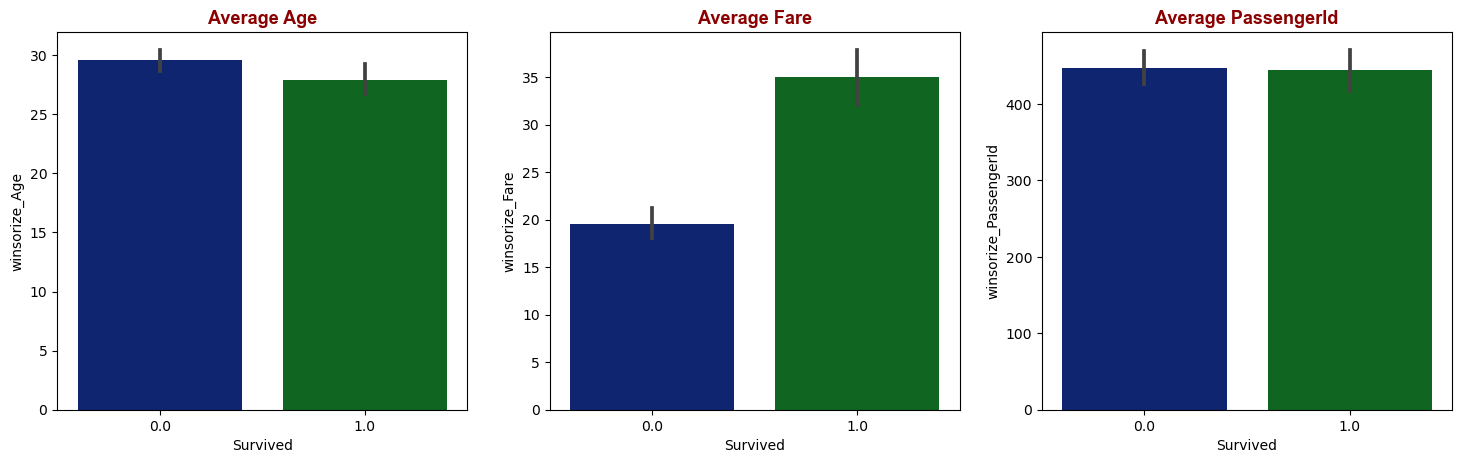

In [44]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(train_df["Survived"], train_df["winsorize_Age"])
plt.title("Average Age", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(train_df["Survived"], train_df["winsorize_Fare"])
plt.title("Average Fare", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(train_df["Survived"], train_df["winsorize_PassengerId"])
plt.title("Average PassengerId", fontdict = title_font)

plt.show()

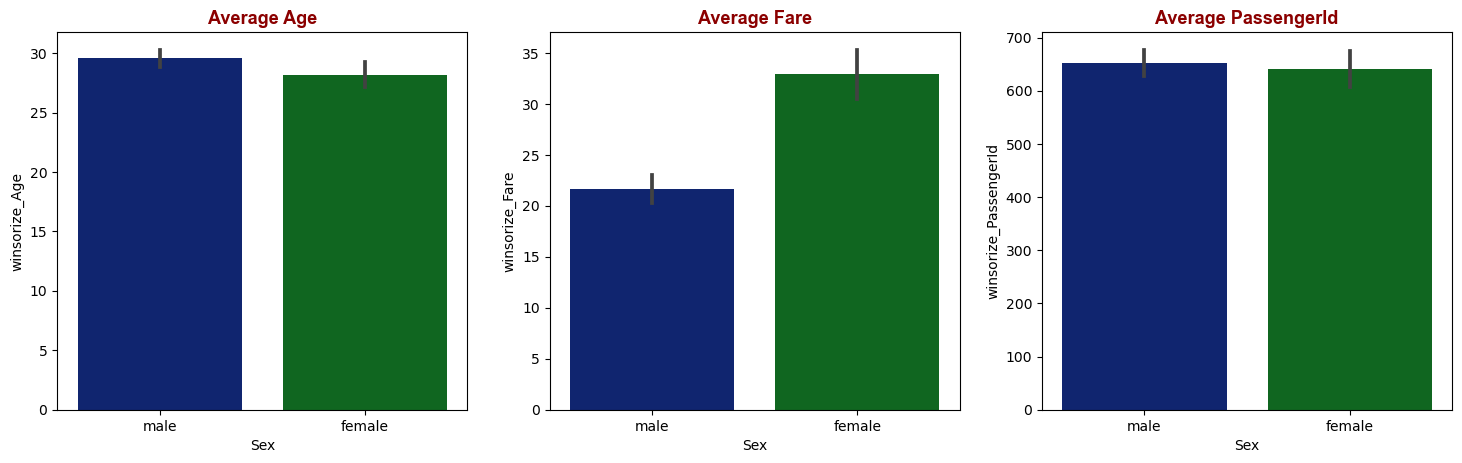

In [45]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(train_df["Sex"], train_df["winsorize_Age"])
plt.title("Average Age", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(train_df["Sex"], train_df["winsorize_Fare"])
plt.title("Average Fare", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(train_df["Sex"], train_df["winsorize_PassengerId"])
plt.title("Average PassengerId", fontdict = title_font)

plt.show()

**t-test**

In [46]:
train_df.dropna(inplace=True)

In [47]:
# Test whether group differences are significant.
train_dfs = train_df["Survived"].unique()
grup_train = train_df.groupby("Survived")

In [48]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["**", "winsorize_Age", "winsorize_Fare"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(train_dfs)):
        for j in range(i+1, len(train_dfs)):
            ttest = stats.ttest_ind(train_df[train_df["Survived"]==train_dfs[i]][var], 
                                train_df[train_df["Survived"]==train_dfs[j]][var])
            group_1 = train_dfs[i]
            group_2 = train_dfs[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison **

KeyError: '**'

In [ ]:
plt.figure(figsize=(8,5))

age = train_df.Age
fare = train_df.Fare

plt.hist(age, alpha=0.5, label='Age') 
plt.hist(fare, alpha=0.5, label='Fare') 
plt.legend(loc='upper right') 
plt.show()

In [ ]:
plt.figure(figsize=(8,5))

sample1 = np.random.choice(age, 100, replace=True)
sample2 = np.random.choice(fare, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='Sample 1') 
plt.hist(sample2, alpha=0.5, label='Sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [ ]:
print("1. Mean of the sample: ", sample1.mean())
print("2. Mean of the sample : ", sample2.mean())
print("1. Standard deviation of sample: ", sample1.std())
print("2. Standard deviation of sample : ", sample2.std())

In [ ]:
difference = sample2.mean() - sample1.mean()
print(difference)

**Correlation Coefficient**

In [ ]:
train_df_map=train_df.corr()
sns.heatmap(train_df_map, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix of Titanic", fontdict=title_font)

plt.show()